# clustering of strains - tree or dist matrix based

In [104]:
import sys,os,random,time,string,itertools
import subprocess
import math
from importlib import reload
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import networkx as nx
from IPython.display import display, HTML
import toyplot,toytree

from btbabm import utils
from snipgenie import clustering

In [8]:
#test data
snpdist = pd.read_csv('cluster_test/snpdist.csv',index_col=0)
meta = pd.read_csv('cluster_test/meta.csv')
treefile = 'cluster_test/tree.newick'
X=meta.set_index('id')[['species','strain']]

In [30]:
#real data
snpdist = pd.read_csv('/storage/btbgenie/all_ireland_results/snpdist.csv',index_col=0)
meta = pd.read_csv('/storage/btbgenie/all_ireland_results/metadata.csv')
treefile = '/storage/btbgenie/all_ireland_results/tree.newick'

In [68]:
meta.iloc[0]
X=meta.set_index('sample')[['Species','SB','County']]

In [46]:
X

,Species,SB,County
sample,,,
1034,Bovine,SB0054,NaN
13-11594,Deer,SB0054,NaN
14-MBovis,NaN,SB0054,NaN
15-11643,Deer,SB0054,NaN
17-11662,Deer,SB0054,NaN
...,...,...,...
BTB-Prov-869,Bovine,SB0142,Londonderry
BTB-Prov-870,Bovine,SB0980,Londonderry
BTB-Prov-871,Bovine,SB0980,Londonderry


In [107]:
T=100
scol='snp100'
# run on subset
sub = list(snpdist.sample(25).index)
S = snpdist.loc[sub,sub]
labels,prevclusters = clustering.dm_cluster(S, T)

#print (prevclusters)
X1=X.loc[sub]
X1[scol]=labels

tree = toytree.tree(treefile)
tips = list(snpdist.drop(S.index).index)
subtree = tree.drop_tips(tips)
subtree.write('sub.newick')

X1.loc['ref',scol] = 0

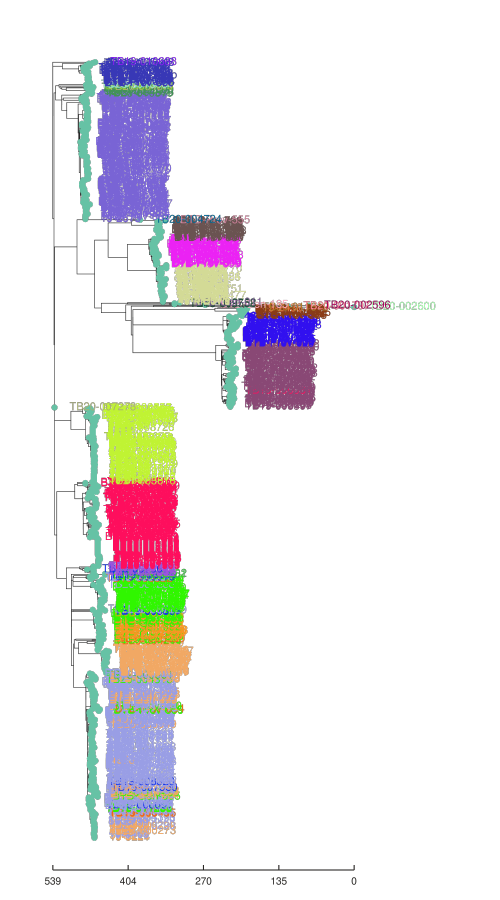

In [108]:
reload(utils)
labels,newclusters = clustering.dm_cluster(snpdist, T, prevclusters)
X[scol]=labels

M=X.copy()
M.loc['ref',scol] = 0
utils.draw_tree(treefile,M,scol,tip_labels=True,height=900)
#sns.clustermap(snpdist, cmap='Blues', row_colors=X.color,figsize=(6,6))

In [110]:
reload(clustering)
cl,members = clustering.get_cluster_levels(snpdist)
cl

,snp200,snp50,snp12,snp3
1034,1,1,1,1
13-11594,1,1,2,2
14-MBovis,1,1,3,3
15-11643,1,1,4,4
17-11662,1,1,2,5
...,...,...,...,...
BTB-Prov-868,3,7,185,538
BTB-Prov-869,3,7,270,537
BTB-Prov-870,3,24,73,108
BTB-Prov-871,3,24,73,108


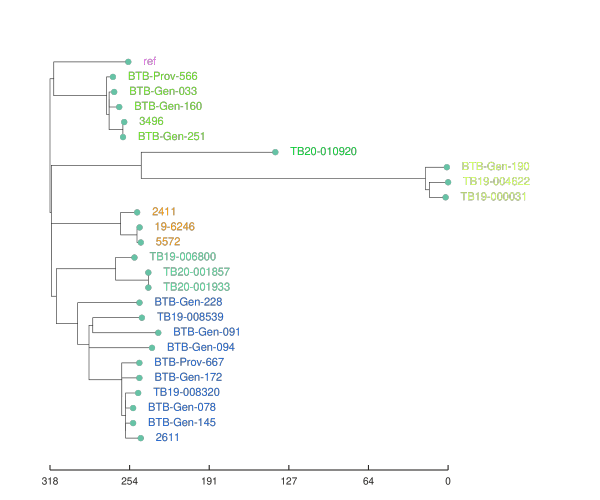

In [111]:
utils.draw_tree('sub.newick',X1,scol,tip_labels=True,width=600)

In [ ]:
sns.clustermap(S, cmap='Blues', row_colors=X1.color,figsize=(6,6))

## strain naming from clusters

In [100]:
reload(clustering)
#print (cl)
clustering.generate_strain_names(cl)

,snp200,snp50,snp12,snp3,strain_name,code
1034,1,1,1,1,ST-1-1-1-0001-0ref,24542660
13-11594,1,1,2,2,ST-1-1-2-0001,11bc73fe
22-12200,1,1,2,2,ST-1-1-2-0002,11bc73fe
26-MBovis,1,1,2,2,ST-1-1-2-0003,11bc73fe
36-MBovis,1,1,2,2,ST-1-1-2-0004-0ref,11bc73fe
...,...,...,...,...,...,...
BTB-Prov-864,12,50,251,536,ST-12-50-536-0001-0ref,c4abf68a
BTB-Prov-866,3,7,270,537,ST-3-7-537-0001-0ref,33f46d4c
BTB-Prov-869,3,7,270,537,ST-3-7-537-0001,33f46d4c
BTB-Prov-868,3,7,185,538,ST-3-7-538-0001-0ref,7113998f


In [102]:
cl.snp50.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])